In [3]:
import torch
import torch.nn as nn
import pandas as pd

In [4]:
"Bill likes peanuts"
"Tom likes peanuts"
"Sam likes peanuts"
"Brenda likes peanuts"

words=['Bill','Tom','Sam','Brenda','likes','peanuts']

"Word"
X=torch.tensor([
[1,0,0,0,0,0],
[0,0,0,0,1,0],
[0,1,0,0,0,0],
[0,0,0,0,1,0],
[0,0,1,0,0,0],
[0,0,0,0,1,0],
[0,0,0,1,0,0],
[0,0,0,0,1,0]]).float()

"Next Word"
y=torch.tensor([
[0,0,0,0,1,0],
[0,0,0,0,0,1],
[0,0,0,0,1,0],
[0,0,0,0,0,1],
[0,0,0,0,1,0],
[0,0,0,0,0,1],
[0,0,0,0,1,0],
[0,0,0,0,0,1]]).float()

In [5]:
model = nn.Sequential(nn.Linear(len(words), 2, bias=False),
                      nn.Linear(2, len(words), bias=False),
                      nn.LogSoftmax(dim=1))
print(model)

Sequential(
  (0): Linear(in_features=6, out_features=2, bias=False)
  (1): Linear(in_features=2, out_features=6, bias=False)
  (2): LogSoftmax(dim=1)
)


In [6]:
learning_rate = 0.01
loss_function = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [12]:
losses = []
for epoch in range(10000):
    pred_y = model(X)
    loss = loss_function(pred_y, y)
    losses.append(loss.item())

    model.zero_grad()
    loss.backward()

    optimizer.step()

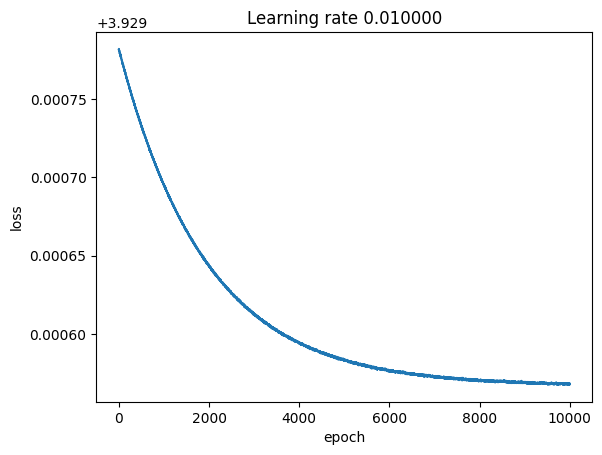

In [13]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.title("Learning rate %f"%(learning_rate))
plt.show()

In [14]:
embeddings = model[0].weight.data.numpy()
df = pd.DataFrame({'word':words,'x':embeddings[0],'y':embeddings[1]})
df

,word,x,y
0,Bill,0.222458,-0.091356
1,Tom,0.222458,-0.091356
2,Sam,0.222458,-0.091356
3,Brenda,0.222458,-0.091356
4,likes,0.064327,0.280531
5,peanuts,0.170706,0.152775


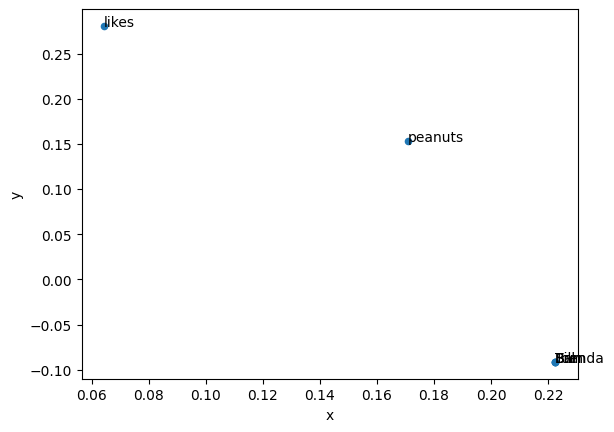

In [15]:
ax=df.plot.scatter(x='x',y='y')

for i in range(len(df)):
    ax.annotate(df['word'][i], (df['x'][i], df['y'][i]))

plt.show()